# Prediction Phase

In [1]:
import pandas as pd
import re
import demoji
import jaconv
from nltk.corpus import words
import nltk
from xml.sax.saxutils import unescape

# Download the dictionary by uncommenting the following line only the first time it is run
# nltk.download('words')

# Get a list of English words from nltk
english_words = set(words.words())

# Regular expression patterns for detecting URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def confirm_URL(df, url_pattern):
    # Checks each line of text for URLs and deletes lines that contain them
    df = df[~df['post'].str.contains(url_pattern, na=False)]

    return df

def convert_to_halfwidth(text):
    return jaconv.z2h(text, kana=False, ascii=True, digit=True)

def replace_words(df, column, replacements):
    """
    Replaces a word in the text of the specified column of the data frame

    :param df: Data Frame
    :param column: Name of column containing text
    :param replacements: Dictionary of words to be replaced (keys are before replacement, values are after replacement)
    """
    df[column] = df[column].apply(lambda x: ' '.join([replacements.get(word, word) for word in x.split()]))
    return df

def text_conversion(text):
    """
    Converting text to complex

    :param text: text
    """

    # Decode encoded strings using unescape
    text = unescape(text)

    # Delete pictograms
    text = demoji.replace(string=text, repl='')

    # Convert to half-width characters
    text = convert_to_halfwidth(text)

    # Delete hashtags
    text = text.replace(';', '; ')
    text = re.sub(r'#.*', "", text)

    # Various symbol processing
    text = re.sub(r'\！', '!', text)
    text = re.sub(r'\!+', '.', text)

    text = re.sub(r'\？', '?', text)
    text = re.sub(r'\‽', '?', text)
    text = re.sub(r'\?+', '.', text)

    text = re.sub(r'\．', '.', text)
    text = re.sub(r'\.+', '.', text)

    text = re.sub(r'\，', ',', text)
    text = re.sub(r'\,+', ',', text)

    text = re.sub(r'\【', '[', text)
    text = re.sub(r'\「', '[', text)
    text = re.sub(r'\[+', '', text)

    text = re.sub(r'\】', ']', text)
    text = re.sub(r'\」', ']', text)
    text = re.sub(r'\]+', '', text)

    text = re.sub(r'\）', ')', text)
    text = re.sub(r'\)+', '', text)

    text = re.sub(r'\（', '(', text)
    text = re.sub(r'\(+', '', text)

    text = re.sub(r'\＿', '_', text)
    text = re.sub(r'\_+', ' ', text)

    # Delete URLs
    text = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" ,text)
    text = text.replace('…', '').replace('²', '').replace('*', '').replace('%', 'percent').replace('; -;', '').replace('.,', '.').replace('. ,', '.').replace(' .', '.')
    text = text.replace('xa0,', '').replace('xa0', '').replace('amp;', '').replace('&', 'and').replace('@', 'at').replace('=', 'is').replace('+', '')
    text = text.replace('percent', ' percent').replace('yo', ' yo')
    # text = text.replace('Removed', '').replace('Removed,', '').replace('Removed.', '')

    # Add spaces after “.” or “,” if there are no spaces
    text = text.replace('.', '. ').replace(',', ', ')
    
    # Remove white space at the beginning and end of sentences
    text = text.strip()
    
    # Replace consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    text = text.replace('"', '').replace("'", '').replace(":", '').replace("Id", 'I would')

    text = text.lower()

    # Newline code deletion
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')

    return text

def capitalize_i(text):
    # Replace single 'i' with 'I'
    text = re.sub(r'\bi\b', 'I', text)
    # Replace 'i' in 'i'm' and 'i'll' with 'I'
    text = re.sub(r"\bi'", "I'", text)

    return text

def capitalize_sentences_initial(text):
    """
    Capitalize the first letter of each sentence.

    :param text: sentence
    :return: String with the first letter of each sentence capitalized
    """
    sentences = re.split(r'(?<=[.!?]) +', text)
    sentences = [s.capitalize() for s in sentences]
    return ' '.join(sentences)

# Dictionary of words to be replaced
replacements = {
    "im": "I am",
    "iam": "I am",
    "i'm": "I am",
    "Im": "I am",
    "I'm": "I am",
    "Ive": "I have",
    "I'd": "I would",
    "ive": "I have",
    "i'd": "I would",
    "tbh": "to be honest",
    "kinda": "kind of",
    "cuz": "because",
    "geez": "jesus christ",
    "ill": "i'll",
    "Id": "i'd",
    "didnt": "didn't",
    "dont": "don't",
    "doesnt": "doesn't",
    "cant": "can't",
    "isnt": "isn't",
    "arent": "aren't",
    "wasnt": "wasn't",
    "werent": "weren't",
    "havent": "haven't",
    "hasnt": "hasn't",
    "hadnt": "hadn't",
    "wont": "won't",
    "wouldnt": "wouldn't",
    "shouldnt": "shouldn't",
    "couldnt": "couldn't",
    "mustnt": "mustn't",
    "shes": "she's",
    "hes": "he's",
    "its": "it's",
    "thats": "that's",
    "theres": "there's",
    "heres": "here's",
    "whos": "who's",
    "whats": "what's",
    "whys": "why's",
    "hows": "how's",
    "lets": "let's",
    "id've": "i'd have",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "we're": "we are",
    "they're": "they are",
    "i'll": "I will",
    "you're": "you are",
    "it's": "it is",
    "idk": "I do not know",
    "we’re": "we are",
    "they’re": "they are",
    "i’ll": "I will",
    "you’re": "you are",
    "it’s": "it is",
    "id’ve": "i'd have",
    "could’ve": "could have",
    "would’ve": "would have",
    "should’ve": "should have",
    "kms": "kill myself",
    "laxy": "lazy",
    "fr": "for real",
    "dont": "do not",
    "plz": "please",
    "irl": "in real life",
    "meim": "maim",
    "imma": "I am going to",
    "ffs": "offs",
    "theyre": "they are",
    "dunno": "do not know",
    "ofc": "of course",
    "wouldk": "would",
    "cantdo": "can not do",
    "tw": "two",
    "harmi": "harm, i",
    "retardi": "retard i",
    "fem": "females",
    "dont": "do not",
    "coz": "because",
    "sch": "school",
    "u": "you",
    "bf": "boyfriend",
    "boy friend": "boyfriend",
    "girl friend": "girlfriend",
    "em": "them",
    "nobodyll": "nobody will",
    "h it": "hit",
    "schoo": "school",
    "xcuse me": "excuse me",
    "wasnt": "was not",
    "tgere": "there",
    "don": "do not",
    "didn": "did not",
    "4kdjejdne sjdjd fuckdjejekieirieiriodidieiridodiodididodidookdkekekdkoeooeoi": "i",
    "yt": "yet",
    "scaared": "scared",
    "fwiled": "failed",
    "wxpecter": "expected",
    "snd": "and",
    "oiving": "living",
    "awwy": "away",
    "cwre": "care",
    "ijust": "i just",
    "ppease": "please",
    "juet": "just",
    "ijust": "i just",
    "wwnt": "want",
    "tefuse": "refuse",
    "tovkill": "to kill",
}

# Dictionary of words to be replaced
detailed_replacements = {
    "i’m": "I am",
    "i'm": "I am",
    "i've": "I have",
    "i'll": "I will",
    "i'd": "I would",
    "didn't": "did not",
    "don't": "do not",
    "doesn't": "does not",
    "can't": "can not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "couldn't": "could not",
    "mustn't": "must not",
    "she's": "she is",
    "he's": "he is",
    "it's": "it is",
    "that's": "that is",
    "there's": "there is",
    "here's": "here is",
    "who's": "who is",
    "what's": "what is",
    "why's": "why is",
    "how's": "how is",
    "let's": "let us",
    "i'd have": "I would have",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "we're": "we are",
    "they're": "they are",
    "i'll": "I will",
    "you're": "you are",
    "it's": "it is",

    # Version ’ instead of '
    "i’ve": "I have",
    "i’ll": "I will",
    "i’d": "I would",
    "didn’t": "did not",
    "don’t": "do not",
    "doesn’t": "does not",
    "can’t": "can not",
    "isn’t": "is not",
    "aren’t": "are not",
    "wasn’t": "was not",
    "weren’t": "were not",
    "haven’t": "have not",
    "hasn’t": "has not",
    "hadn’t": "had not",
    "won’t": "will not",
    "wouldn’t": "would not",
    "shouldn’t": "should not",
    "couldn’t": "could not",
    "mustn’t": "must not",
    "she’s": "she is",
    "he’s": "he is",
    "it’s": "it is",
    "that’s": "that is",
    "there’s": "there is",
    "here’s": "here is",
    "who’s": "who is",
    "what’s": "what is",
    "why’s": "why is",
    "how’s": "how is",
    "let's": "let us",
    "i’d have": "I would have",
    "could’ve": "could have",
    "would’ve": "would have",
    "should’ve": "should have",
    "we’re": "we are",
    "they’re": "they are",
    "i’ll": "I will",
    "you’re": "you are",
    "it’s": "it is",
    "covid19": "covid-19",
    "covid 19": "covid-19",
    "Covid 19": "covid-19",
    "Covid19": "covid-19",
    "schizoaffective": "schizo-affective",
    "schizo affective": "schizo-affective",
    "thatll": "that will",
    "ibs-d": "Ibs-d",
    "ibsd": "Ibs-d",
    "ibs d": "Ibs-d",
    "Ibs d": "Ibs-d",
    "Ibs-d": "Ibs-d",
    "B-day": "birthday",
    "b-day": "birthday",
}

# Dictionary of words to be replaced (slang words)
slang_dict = {
    "brb": "be right back",
    "dms": "direct messages",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "idk": "i don't know",
    "btw": "by the way",
    "bff": "best friends forever",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "fyi": "for your information",
    "irl": "in real life",
    "yolo": "you only live once",
    "rofl": "rolling on the floor laughing",
    "smh": "shaking my head",
    "nvm": "never mind",
    "gtg": "got to go",
    "ily": "i love you",
    "jk": "just kidding",
    "tmi": "too much information",
    "fomo": "fear of missing out",
    "lmao": "laughing my ass off",
    "ttyl": "talk to you later",
    "icymi": "in case you missed it",
    "rn": "right now",
    "soml": "story of my life",
    "afk": "away from keyboard",
    "bae": "before anyone else",
    "cya": "see you",
    "diy": "do it yourself",
    "ftw": "for the win",
    "gg": "good game",
    "idc": "i don't care",
    "ilysm": "i love you so much",
    "jkl": "just kidding lol",
    "lmk": "let me know",
    "nbd": "no big deal",
    "nm": "not much",
    "nsfw": "not safe for work",
    "omw": "on my way",
    "ppl": "people",
    "tba": "to be announced",
    "tl;dr": "too long; didn't read",
    "wtf": "what the fuck",
    "wyd": "what you doing",
    "sus": "suspicious",
    "vibe": "feeling/atmosphere",
    "stan": "obsessive fan",
    "goat": "greatest of all time",
    "snacc": "attractive person",
    "lit": "exciting or amazing",
    "flex": "show off",
    "noob": "newbie",
    "savage": "bold or unapologetic",
    "mood": "current feeling",
    "clapback": "witty response",
    "thirsty": "desperate",
    "bop": "good song",
    "fam": "family or friends",
    "ship": "relationship",
    "big yikes": "major embarrassment",
    "cap": "lie",
    "no cap": "no lie",
    "bet": "sure or okay",
    "drip": "stylish",
    "cheugy": "outdated or uncool",
    "fit": "outfit",
    "go off": "express yourself",
    "heat": "high-quality content",
    "hundo p": "100 percent",
    "iykyk": "if you know, you know",
    "jomo": "joy of missing out",
    "l": "loss or failure",
    "simp": "overly attentive person",
    "snap": "snapchat",
    "slaps": "hits hard (good song)",
    "troll": "provoke online",
    "v": "very",
    "w": "win",
    "yeet": "throw/awesome",
    "lmao": "laughing my ass/arse off",
    "yo": "years old",
    "ya": "you",
}

# Dictionary of words to be replaced (slang words)
negative_slang_dict = {
    "kms": "kill myself",
    "kys": "kill yourself",
    "s/i": "self-injury",
    "c/t": "cutting",
    "od": "overdose",
    "ed": "eating disorder",
    "anx": "anxiety",
    "depr": "depression",
    "su": "suicidal",
    "bpd": "borderline personality disorder",
    "ts": "triggering",
    # "sad": "sadness",
    # "loner": "someone who feels isolated or alone",
    # "breakdown": "mental or emotional collapse",
    # "blackout": "loss of memory or consciousness",
    # "panic": "panic attack",
    # "meltdown": "emotional or mental breakdown",
    # "overthinking": "thinking too much about something",
    # "worthless": "feeling without value",
    # "hopeless": "feeling without hope",
    # "burnout": "extreme stress or exhaustion",
    # "self-loathing": "intense dislike of oneself",
    # "isolation": "feeling isolated or cut off from others",
    # "ghosted": "suddenly cut off communication",
    # "pain": "emotional or physical suffering",
    # "stress": "mental or emotional strain",
    # "crying": "shedding tears due to emotional pain",
    # "hurt": "feeling emotional or physical pain",
    # "miserable": "very unhappy or uncomfortable",
    # "broken": "feeling deeply hurt or defeated",
    # "trauma": "emotional response to a terrible event",
    # "regret": "feeling of sadness over past actions",
    # "grief": "deep sorrow, especially caused by death",
    # "shame": "feeling of guilt or disgrace",
    # "guilt": "feeling responsible for a wrongdoing"
}


URL_replacements = {
    "https://www.reddit.com/r/SuicideWatch/comments/jkf5bw/why_my_boyfriend_would_suggest_this_if_he_loves_me/": "Why my boyfriend would suggest this if he loves me.",
    "https://www.reddit.com/r/depression/comments/6izgy2/i_feel_hopeless_and_want_to_die/": "I Feel hopeless and want to die.",
    "https://www.reddit.com/r/AskReddit/comments/n1vroe/serious\\_redditors\\_who\\_have\\_lost\\_someone\\_to/](https://www.reddit.com/r/AskReddit/comments/n1vroe/serious_redditors_who_have_lost_someone_to/))": "[Serious] Redditors who have lost someone to suicide, what was it like?",
    "https://imgur.com/a/EqLEah7": "Recent therapy notes. I have since quit my job and haven’t left my apartment in three days.",
    "https://www.reddit.com/r/SuicideWatch/comments/jhy5yh/please_read_i_am_sad_not_suicidal_but_still/": "Please read. I am sad not suicidal but still..",
    "https://www.reddit.com/r/relationship_advice/comments/jcumcc/i_need_his_affection_and_love_but_i_dont_know_how/": "I need his affection and love but I don't know how to Express it right now...please read",
    "https://www.reddit.com/r/SuicideWatch/comments/kfpjrv/what_are_the_conditions_for_not_feeling_finegood/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf": "What are the conditions for not feeling fine/good about death?",
    "https://www.reddit.com/r/SuicideWatch/comments/knffgq/accidental_unknowing_rapist_and_i_cant_live_with/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf)": '"accidental, unknowing rapist" and i cant live with myself.',
    "https://www.reddit.com/r/SuicideWatch/comments/jja9xt/i_cant_decide_if_i_want_to_wait_until_the_us/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf": "i cant decide if i want to wait until the US election results, or if i should just do it now because either way everything that is already shit is only going to get shittier",
}

# Function to replace nonsensically consecutive characters
def normalize_text(text):
    # Replace multiple consecutive parts of the same word
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    
    # Replace multiple repeated combinations of the same word
    text = re.sub(r'\b(\w+ \w+)( \1)+\b', r'\1', text)
    
    # Replace words that contain the same character three or more times in a row
    return re.sub(r'(.)\1{2,}', r'\1', text)

def drop_none_text(df):
    df['length'] = df['post'].apply(len)
    df = df[df['length']!=0]
    df = df.drop(columns='length')
    return df

def is_meaningful_word(word):
    # Check if the word exists in the dictionary of English words.
    return word.lower() in english_words

def extract_meaningful_text(text):
    # Regular expressions split sentences
    sentences = re.split(r'\. |\? |\! ', text)
    meaningful_sentences = []
    
    for sentence in sentences:
        words_in_sentence = sentence.split()
        if all(is_meaningful_word(word) or word.isdigit() for word in words_in_sentence):
            meaningful_sentences.append(sentence)
    
    return '. '.join(meaningful_sentences)

def extract_only_number_text(text):
    text = text.replace('wouldk', 'would').replace('.,', '.').replace('. ,', '.').replace(' .', '.').replace('h it', 'hit')
    text = text.replace('xcuse me', 'excuse me').replace('wer elearning', 'we are learning').replace('gonan', 'gonna').replace('nught', 'night').replace('hi mto', 'him to')
    text = text.replace('wasnt', 'was not').replace('wouldve', 'would have').replace('Https/imgur. Com/a/t3wtiov', '').replace('didnt', 'did not').replace('youve', 'you have')
    text = text.replace('4kdjejdne sjdjd fuckdjejekieirieiriodidieiridodiodididodidookdkekekdkoeooeoi', 'I').replace('Soi nherently unlikeable.', 'So I am inherently unlikeable.')
    text = text.replace('couldve', 'could have').replace('allcmy xanax and effexo', 'all my xanax and effexor')
    text = text.replace('Hope my mom callsme selfieh whem shensees my dewdnbody I am the morjimg.', 'Hope my mom calls me selfish when she sees my dead body in the morning.')
    text = text.replace('scaared', 'scared').replace('fwiled', 'failed').replace('wxpecter', 'expected').replace('snd', 'and').replace('oiving', 'living')
    text = text.replace('awwy', 'away').replace('cwre', 'care').replace('ijust', 'I just').replace('Ppease', 'Please').replace('juet', 'just')
    text = text.replace('wwnt', 'want').replace('tefuse', 'refuse').replace('tovkill', 'to kill').replace('callsme', 'calls me').replace('shensees', 'she sees')
    text = text.replace('I just turned 17 band', 'I just turned 17 and')
    text = text.replace('callckyself', 'call myself').replace('sngry', 'angry').replace('tlaking', 'talking')
    text = text.replace('howckuch', 'how much').replace('hebstarted', 'he started').replace('talkikgnsbout', 'talking about')
    text = text.replace('hownimnalmost', 'how I am almost').replace('almpdt', 'almost').replace('accountnto', 'account to')
    text = text.replace('mynfriend', 'my friend').replace('killijgnmyself', 'killing myself').replace('willcbe', 'will be')
    text = text.replace('awrulclife', 'awful life').replace('willcbe', 'will be').replace('youre', 'you are')
    text = text.replace('6 mo on', '6 months on').replace('knw', 'know').replace('an yone', 'anyone').replace('wont', 'will not').replace('dont', 'do not').replace('ever yones', 'everyones')
    text = text.replace('ever yone', 'everyone').replace('overdosibg', 'overdosing').replace('temme', 'tell me')
    
    # Regular expressions remove meaningless strings and extract meaningful sentences
    sentences = re.split(r'\. |\? |\! ', text)
    meaningful_sentences = [sentence for sentence in sentences if re.search(r'[a-zA-Z]', sentence)]
    return '. '.join(meaningful_sentences)
    
def preprosessing_text(df, url_pattern):

    # Replacing URLs
    # df = replace_words(df, 'post', URL_replacements)

    # Delete lines containing URLs
    df = confirm_URL(df, url_pattern)

    # Correcting meaningless consecutive words
    df['post'] = df['post'].apply(normalize_text)
    
    # Text Processing
    df['post'] = df['post'].apply(text_conversion)

    # Perform replacements
    df = replace_words(df, 'post', replacements)
    df = replace_words(df, 'post', detailed_replacements)
    df = replace_words(df, 'post', slang_dict)
    df = replace_words(df, 'post', negative_slang_dict)

    # Capitalize the first letter of each sentence
    df['post'] = df['post'].apply(capitalize_sentences_initial)
    df['post'] = df['post'].apply(capitalize_i)

    df = drop_none_text(df)

    # Remove unintelligible words
    # df['post'] = df['post'].apply(extract_meaningful_text)

    # Delete sentences with only numbers
    df['post'] = df['post'].apply(extract_only_number_text)

    return df

def text_sort(df):
    # Sort by length of sentences in POST column
    df['length'] = df['post'].apply(len)
    df = df[df['length']!=0]
    df = df.sort_values(by='length').reset_index(drop=True)
    df = df.drop(columns='length')

    return df

In [2]:
def simple_capitalize_text(text):
    text = text.lower()
    # Remove white space at the beginning and end of sentences
    text = text.strip()
    
    # Replace consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')
    text = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" ,text)
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')
    return text

def simple_fix_text(df, url_pattern):
    df = confirm_URL(df, url_pattern)
    df['post'] = df['post'].apply(simple_capitalize_text)
    return df

In [5]:
import torch
import torch.nn as nn
from transformers.trainer_utils import set_seed
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, AutoModel, AdamW
import numpy as np
import pandas as pd
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from pprint import pprint
from datasets import Dataset
from typing import Union
from transformers import BatchEncoding, EarlyStoppingCallback
from collections import Counter
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import random
import json
import shap
import scipy as sp

def set_random_seed(seed: int = 42):
    set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    # Settings for reproducibility
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


set_random_seed(42)

def report_memory():
    print(f"Allocated: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MiB")
    print(f"Cached: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MiB")

def cleanup_gpu_memory():
    """
    Function to empty GPU cache, reset CUDA memory, and display memory usage.
    """
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.reset_accumulated_memory_stats()

    print("After cleanup:")
    report_memory()

## SHAP ##

def shap_values_to_df(shap_values, unique_labels):
    num_samples, dummy, num_classes = shap_values.shape

    print("Converting shap values to Dataframe. It takes a few minutes")

    # SHAP値を格納するリスト
    data = []
    for i in range(num_samples):
        print(f"Converting {i}/{num_samples} to Dataframe")
        num_tokens = shap_values[i].data.shape[0]
        
        for j in range(num_tokens):
            for k in range(len(unique_labels)):
                data.append({
                    'sample': i,
                    'token': shap_values[i].data[j],
                    'class': unique_labels[k],
                    'shap_value': shap_values[i].values[j][k]
                })
    print("Done!!")

    # データフレームを作成
    return pd.DataFrame(data)

def calculate_shap(model, tokenizer, df, num):
    num_labels = 4  # 0から3のラベル数を固定
    all_possible_labels = [0, 1, 2, 3]  # 全てのラベルの値
    re_conversion_dict = {
        0: 'indicator',
        1: 'ideation',
        2: 'behavior',
        3: 'attempt'
    }
    
    unique_labels = sorted(df['suicide risk'].unique().tolist())  # ラベルを昇順にソート

    # unique_labelsに含まれていないラベルを補完する
    missing_labels = list(set(all_possible_labels) - set(unique_labels))
    labels = unique_labels + missing_labels[:(num_labels - len(unique_labels))]  # 不足ラベルを追加

    unique_labels = [re_conversion_dict[value] for value in labels]
    
    # SHAPのExplainerの設定とSHAP値の計算
    def f(x):
        tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=512, truncation=True) for v in x]).to(model.device)
        attention_mask = (tv != 0).type(torch.int64).to(model.device)
        outputs = model(tv, attention_mask=attention_mask)[0].detach().cpu().numpy()
        return sp.special.logit((np.exp(outputs).T / np.exp(outputs).sum(-1)).T)
    
    sentences = df['post'].head(num)
    shap_values = shap.Explainer(f, tokenizer, output_names=unique_labels)(sentences.tolist())
    
    # SHAP値の特徴量名を取得
    feature_names = shap_values.feature_names

    # SHAP値を DataFrame に変換する例
    # feature_names_list = feature_names  # トークンのリスト
    unique_labels_list = unique_labels  # クラスラベルのリスト
    
    shap_df = shap_values_to_df(shap_values, unique_labels_list)
    
    return shap_df

def plot_shap(shap_file, num_appear, top_n, shap_kind, dir_cv):
    # shap_value.csvからデータを読み込む
    shap_df = pd.read_csv(shap_file)
    
    # tokenカラムの半角スペースを削除
    shap_df['token'] = shap_df['token'].str.replace(' ', '', regex=False)
    
    # 除外したいトークンをリストで指定
    exclude_tokens = ['the','a']

    # 除外するトークンをフィルタリング
    shap_df = shap_df[~shap_df['token'].isin(exclude_tokens)]
    
    # クラスごとにプロットを作成
    classes = shap_df['class'].unique()
    for cls in classes:

        print(f"Class={cls}")
        df_cls = shap_df[shap_df['class'] == cls]
        
        # トークンごとの平均、標準偏差、カウントを計算
        grouped = df_cls.groupby('token')['shap_value'].agg(['mean', 'std', 'count']).reset_index()
        
        # 点の数が3個以上のトークンのみを抽出
        filtered_grouped = grouped[grouped['count'] >= num_appear]
        
        # 平均値の絶対値が大きい順にトークンを並べ替え
        sorted_grouped = filtered_grouped.reindex(filtered_grouped['mean'].abs().sort_values(ascending=False).index)
        
        # top_n トークンのみを選択
        top_tokens = sorted_grouped.head(top_n)['token']
        
        # フィルタリング後のデータを元に df_cls も並べ替え
        df_cls = df_cls[df_cls['token'].isin(top_tokens)]
        df_cls['token'] = pd.Categorical(df_cls['token'], categories=top_tokens, ordered=True)
        
        plt.figure(figsize=(6, 12))
        
        # 散布図を描く
        sns.scatterplot(data=df_cls, x='shap_value', y='token', color='red', alpha=0.5)
        
        # エラーバー付きの横棒を描く（トークンごとに）
        top_grouped = sorted_grouped[sorted_grouped['token'].isin(top_tokens)]
        plt.errorbar(x=top_grouped['mean'], y=top_grouped['token'], xerr=top_grouped['std'], fmt='s', color='blue', capsize=5, label='Mean ± Std')
        
        # x=0 の実線を引く
        plt.axvline(x=0, color='black', linestyle='-')

        
        # プロットのラベルとタイトルを設定
        plt.title(f'SHAP values')
        plt.ylabel('Token')
        plt.xlabel('SHAP Value')
        
        # グリッド表示
        plt.grid(True)

        plt.savefig(f'{dir_cv}/{shap_kind}_{cls}.svg', format='svg')
        
        plt.show()

##########

def make_vector_data(model, tokenizer, df, device, dir, date, kind, shap_kind):
    if not os.path.exists(dir): 
        os.makedirs(dir)
        
    # Execute 10 rows at a time
    num_rows_per_df = 5
    dfs = [df.iloc[i:i + num_rows_per_df] for i in range(0, len(df), num_rows_per_df)]
    
    print('Start Reasoning')
    
    # List to store data frames after processing
    processed_dfs = []
    submit_dfs = []
    all_dfs = []

    max_length = tokenizer.model_max_length

    print('model_max_length:', max_length)
    
    for i, df_part in enumerate(dfs):
        set_random_seed(42)
    
        df_part = df_part.reset_index(drop=True)
        
        data_list = df_part['post'].values.tolist()
        inputs = tokenizer(data_list, return_tensors='pt', max_length=max_length, truncation=True, padding='longest')
    
        # Transfers input data to the same device as the model
        inputs = {k: v.to(device) for k, v in inputs.items()}
    
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True)
            # 4 vector extraction near the final layer
            final_layer_vectors = torch.cat([outputs["hidden_states"][-1*i][:,0] for i in range(1, 4+1)], dim=1)
            print(f"Shape of final_layer_vectors_{kind}: {final_layer_vectors.shape}")
    
        # mean_vectors = final_layer_vectors.mean(dim=1).cpu().numpy()
        final_layer_vectors = final_layer_vectors.cpu().numpy()
        df_vec = pd.DataFrame(final_layer_vectors).reset_index(drop=True)

        if kind == 'test':
            pass
        else:
            df_vec['post_risk'] = df_part['post_risk']
            print('')
            print('Completion of vector extraction for training and evaluation data')
    
        ################################################################################################
        del data_list, inputs, final_layer_vectors
        cleanup_gpu_memory()
        ################################################################################################
    
        # Obtaining prediction result
        logits = outputs.logits
        pred = F.softmax(logits, dim=-1)
        df_pred = pd.DataFrame(pred.cpu().numpy(), columns=['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']).reset_index(drop=True)
    
        result_df = pd.DataFrame(pred.cpu().numpy().argmax(axis=1), columns=['suicide risk']).reset_index(drop=True)
    
        df_merged = pd.concat([result_df, df_pred], axis=1)
        df_merged['post'] = df_part['post']
        df_merged = pd.concat([df_merged, df_vec], axis=1)
        submit_dfs.append(df_merged)

        ## SHAP ##
        shap_df = calculate_shap(model, tokenizer, df_merged[['suicide risk', 'post']], len(df_merged))
        all_dfs.append(shap_df)

        ################################################################################################
        del logits, outputs, pred, df_pred, result_df, df_part, df_merged, df_vec, shap_df
        cleanup_gpu_memory()
        ################################################################################################
        
    shap_dfs = pd.concat(all_dfs, ignore_index=True)

    shap_dfs.to_csv(f"{dir_cv}/shap_value_{shap_kind}.csv", index=False)
    plot_shap(f"{dir_cv}/shap_value_{shap_kind}.csv", 5, 30, shap_kind, dir_cv)
    
    df_submit = pd.concat(submit_dfs, ignore_index=True)
    # df_submit.to_csv(f'{dir}/submission_mental_LongFormer_{kind}_{date}.csv', float_format='%.30f')

    ################################################################################################
    del submit_dfs, df_submit, dfs
    cleanup_gpu_memory()
    ################################################################################################


Completion of data preparation
Start Reasoning
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1395.98 MiB
Cached: 1536.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:29<00:14,  7.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:09,  9.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.80s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1397.98 MiB
Cached: 1644.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:43<00:10, 10.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.98s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1493.48 MiB
Cached: 1640.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:30<00:16,  8.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:49<00:12, 12.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:03<00:00, 13.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:16, 15.33s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:43<00:00,  7.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [00:56, 11.33s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.42s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.48s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.46s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.61s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.62s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1493.48 MiB
Cached: 1640.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:31<00:18,  9.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:11, 11.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:14, 14.84s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1790.98 MiB
Cached: 2022.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:38<00:13,  6.79s/it]

  0%|          | 0/210 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:06,  6.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00,  9.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:12, 14.42s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1397.98 MiB
Cached: 1644.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.87s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1397.98 MiB
Cached: 1644.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.59s/it]

  0%|          | 0/272 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:33<00:06,  6.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:46<00:00,  8.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:02, 12.49s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1397.98 MiB
Cached: 1644.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 12.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:10, 14.05s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.48s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.72s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:06, 13.35s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1298.48 MiB
Cached: 1444.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.59s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
Class=indicator


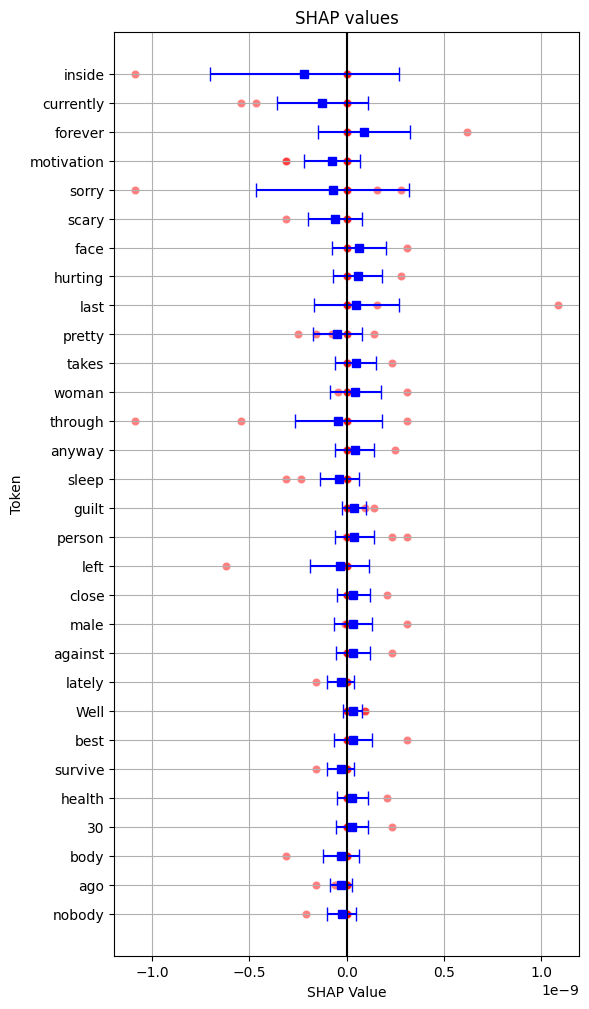

Class=behavior


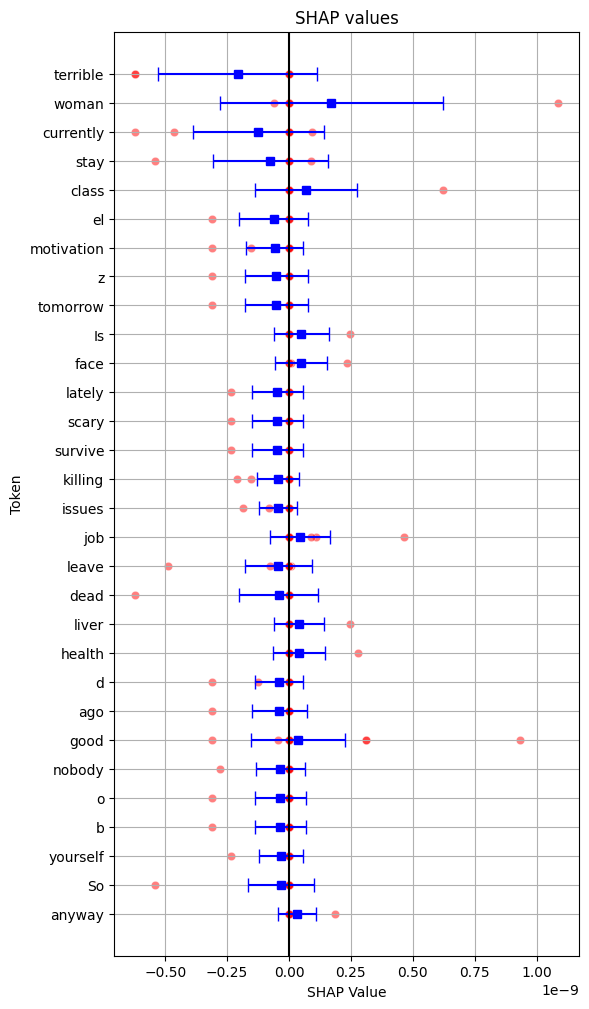

Class=attempt


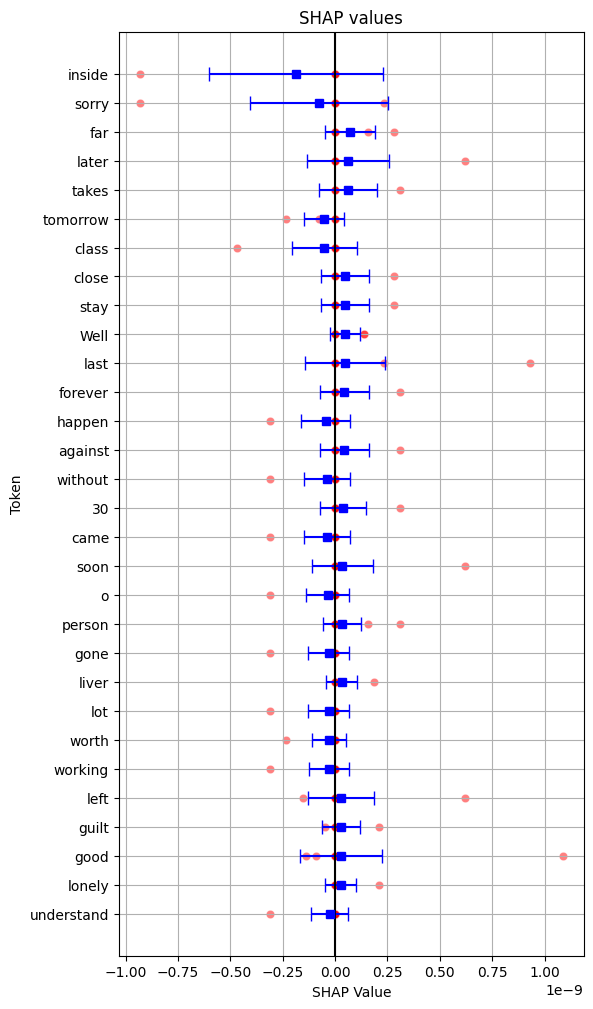

Class=ideation


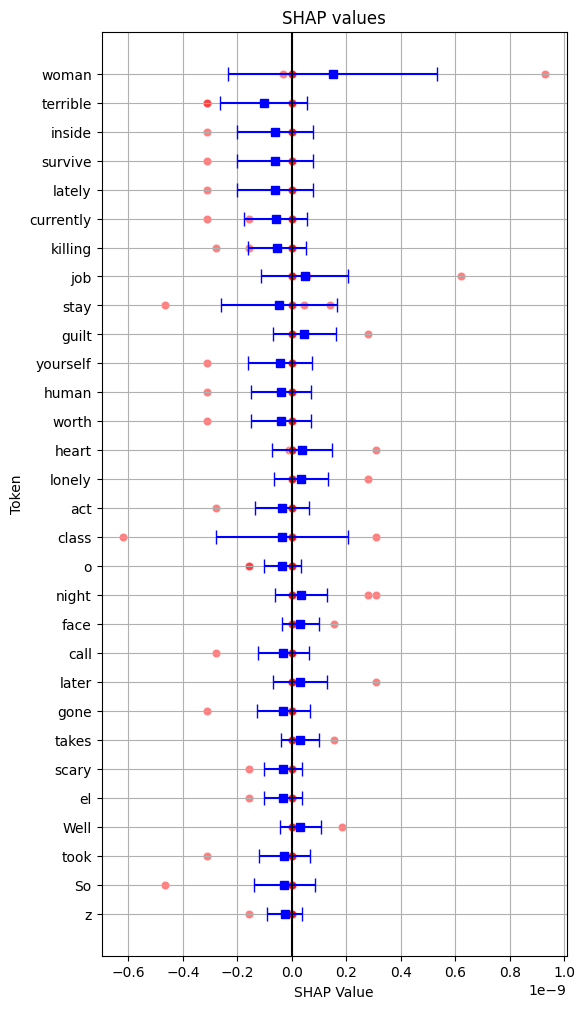

After cleanup:
Allocated: 1200.98 MiB
Cached: 1262.00 MiB
After cleanup:
Allocated: 615.64 MiB
Cached: 690.00 MiB
Start Reasoning
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:09,  9.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.76s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:14,  7.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.54s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.44s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.94s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:30<00:16,  8.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:49<00:12, 12.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:03<00:00, 13.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:16, 15.25s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:43<00:00,  7.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [00:56, 11.32s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.40s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.43s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.57s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.66s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.57s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:31<00:18,  9.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:11, 11.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:14, 14.86s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1776.48 MiB
Cached: 2052.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:38<00:13,  6.79s/it]

  0%|          | 0/210 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:06,  6.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00,  9.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:12, 14.43s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.88s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.60s/it]

  0%|          | 0/272 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:33<00:06,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:46<00:00,  8.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:02, 12.52s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 12.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:10, 14.02s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.52s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.73s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:06, 13.32s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Class=indicator


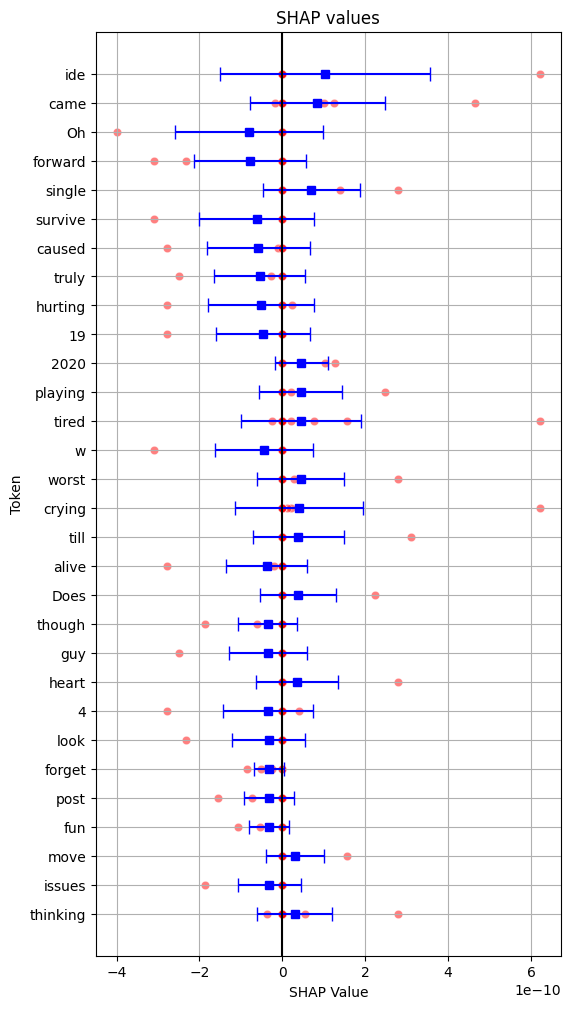

Class=behavior


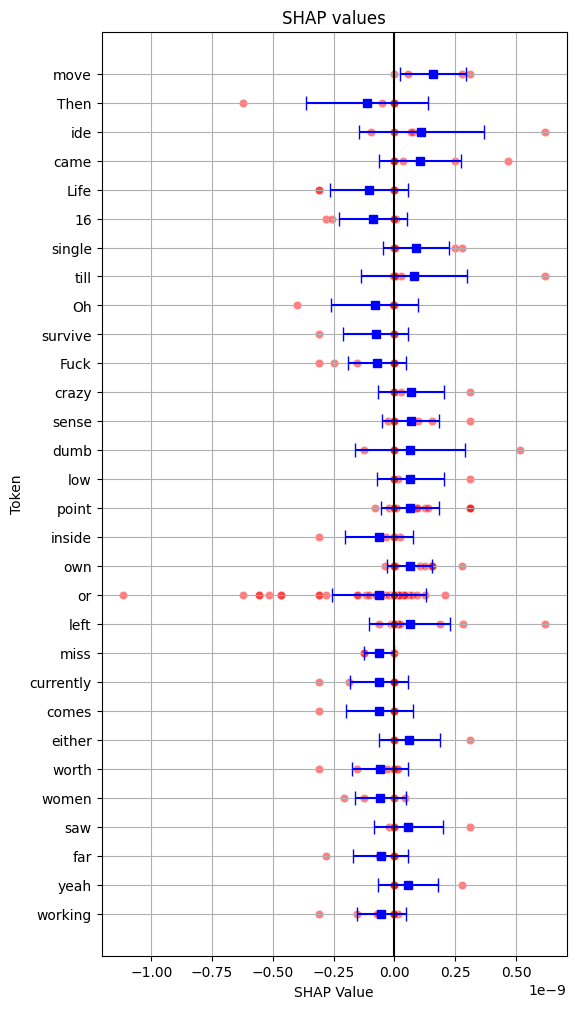

Class=attempt


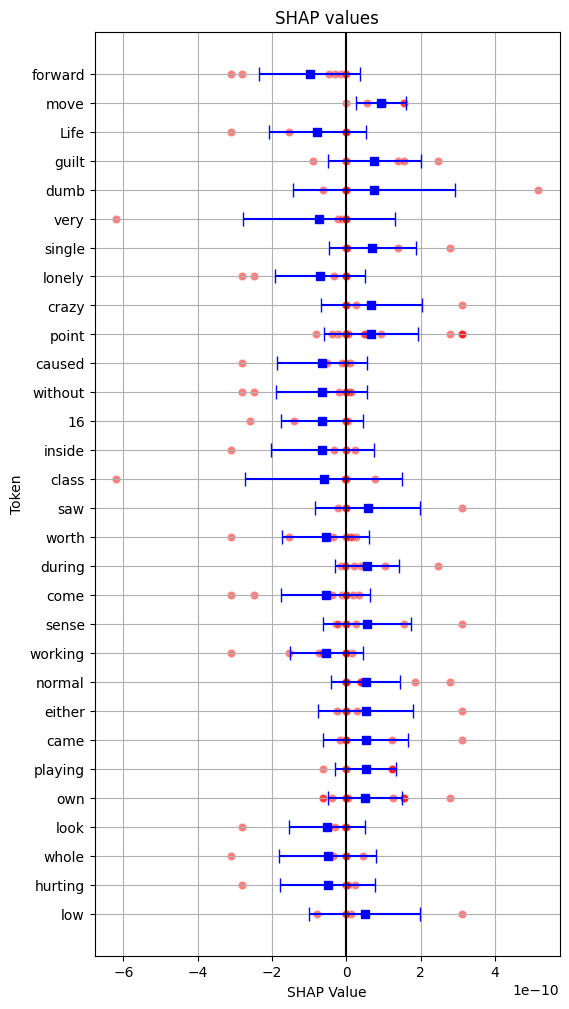

Class=ideation


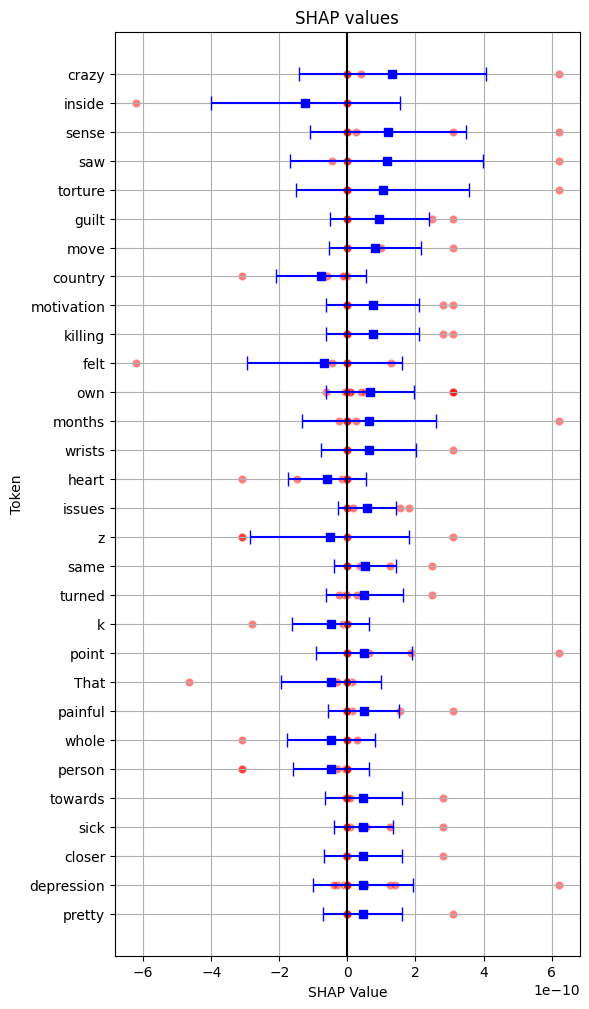

After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
After cleanup:
Allocated: 615.64 MiB
Cached: 690.00 MiB
Start Reasoning
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:29<00:14,  7.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:09,  9.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.80s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:14,  7.11s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.53s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.91s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:29<00:15,  7.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:49<00:12, 12.77s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:02<00:00, 13.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:15, 15.19s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:43<00:00,  7.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [00:57, 11.41s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:32<00:13,  6.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:09,  9.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00, 10.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:12, 14.44s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.45s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.60s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.56s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:31<00:18,  9.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:11, 11.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:14, 14.84s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1776.48 MiB
Cached: 2052.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:38<00:13,  6.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:52<00:09,  9.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:05<00:00, 10.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:18, 15.77s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.87s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.61s/it]

  0%|          | 0/272 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:33<00:06,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:46<00:00,  8.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:02, 12.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 12.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:10, 14.09s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.50s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.70s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:06, 13.33s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.67s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.59s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Class=indicator


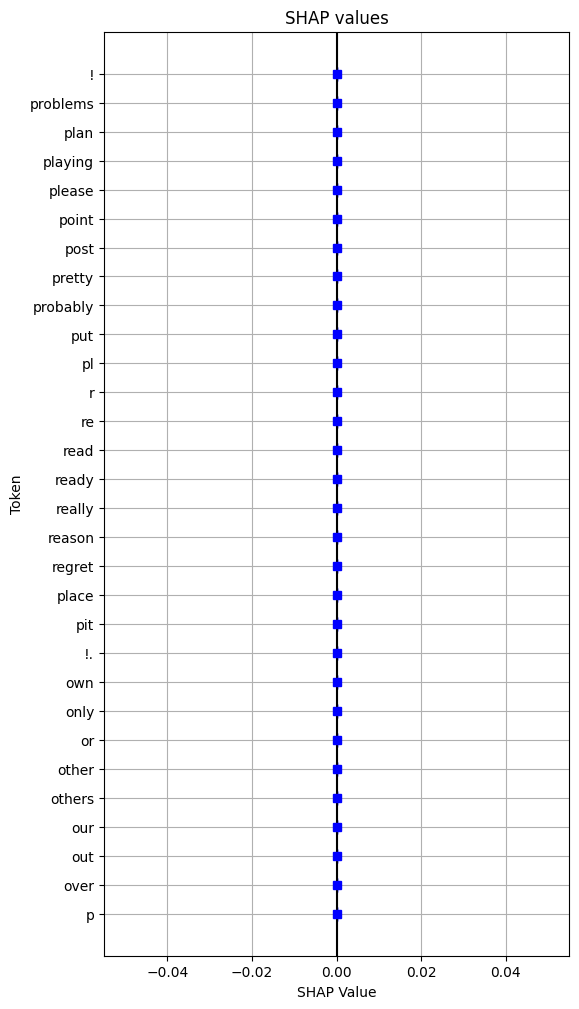

Class=behavior


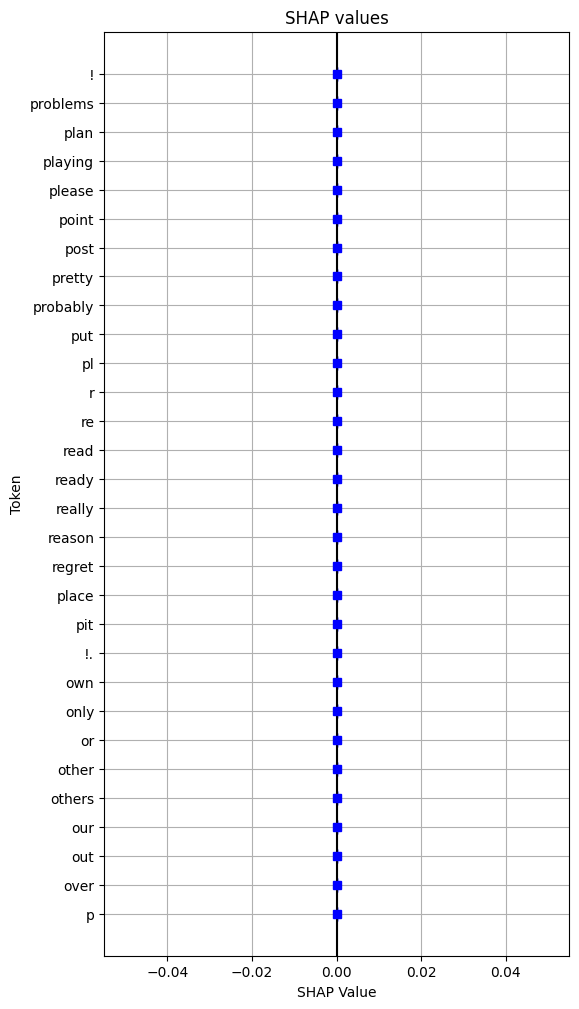

Class=attempt


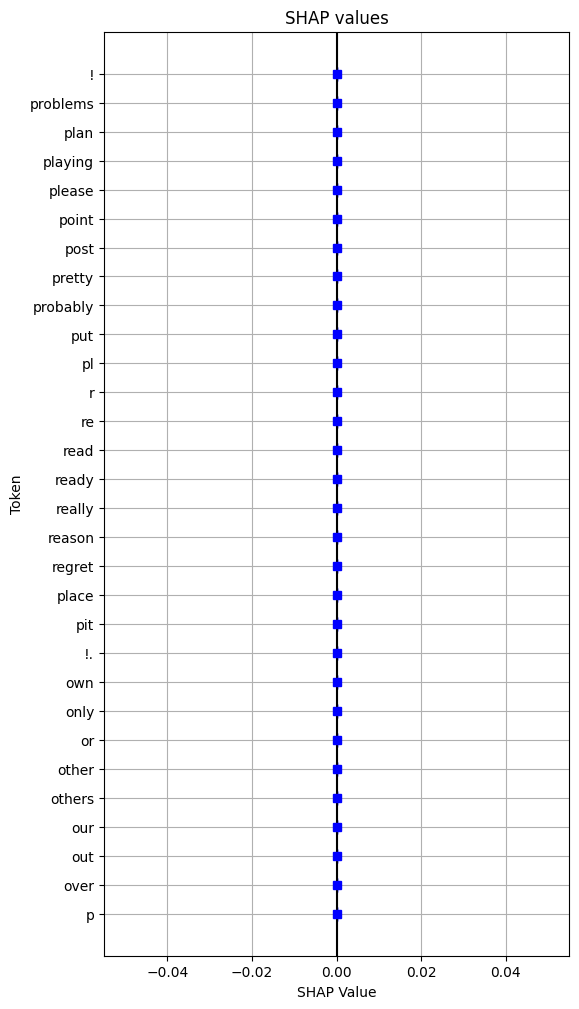

Class=ideation


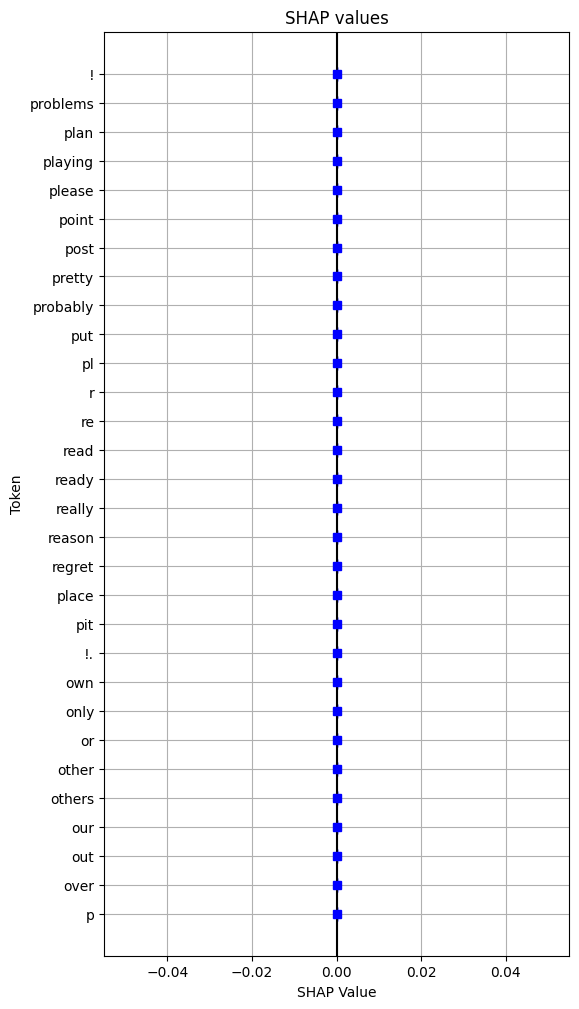

After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
After cleanup:
Allocated: 615.64 MiB
Cached: 690.00 MiB
Start Reasoning
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:29<00:14,  7.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:09,  9.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.79s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.54s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:43<00:10, 10.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.98s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.55s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:30<00:16,  8.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:49<00:12, 12.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:03<00:00, 13.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:16, 15.27s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:43<00:00,  7.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [00:57, 11.42s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:32<00:13,  6.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:09,  9.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:59<00:00, 10.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:12, 14.46s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.46s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.55s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.58s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.62s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.59s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:31<00:18,  9.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:11, 11.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:14, 14.87s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1776.48 MiB
Cached: 2052.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:38<00:13,  6.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:51<00:09,  9.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:05<00:00, 11.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:18, 15.77s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.88s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.60s/it]

  0%|          | 0/272 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:33<00:06,  6.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:46<00:00,  8.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:02, 12.57s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.62s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 12.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:10, 14.03s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.48s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:13,  6.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.73s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:26<00:13,  6.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:06, 13.32s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.70s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.60s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Class=indicator


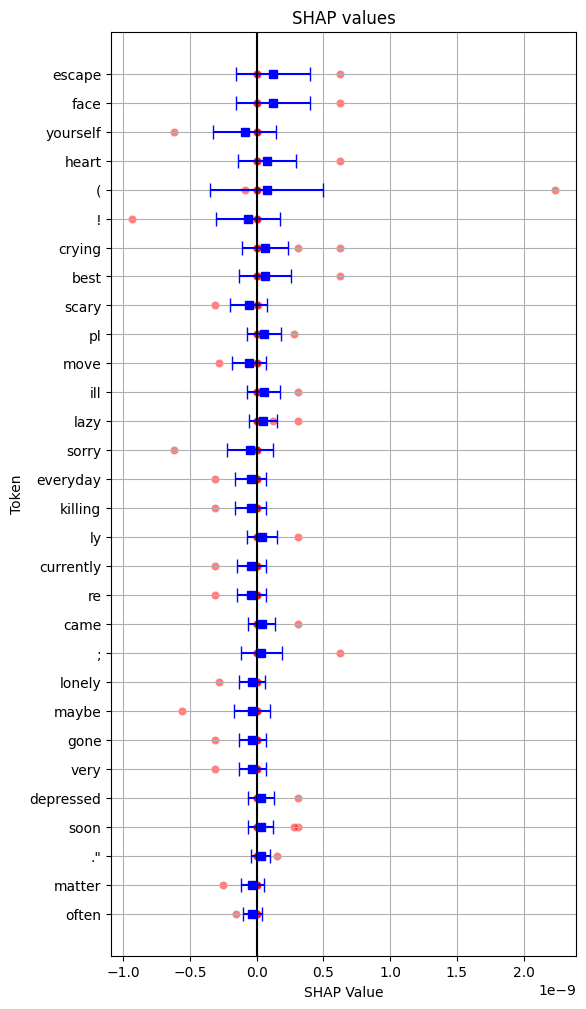

Class=behavior


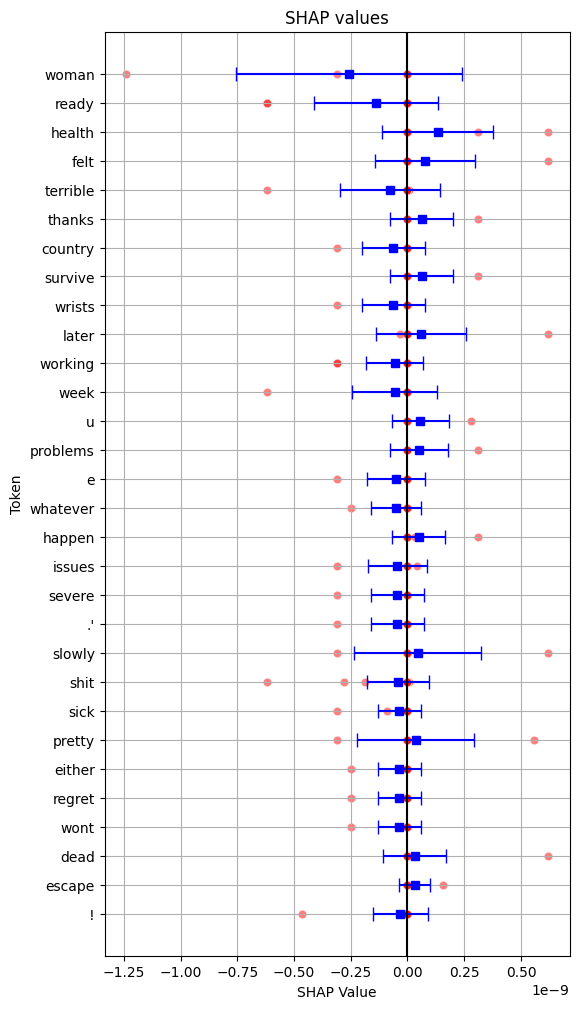

Class=attempt


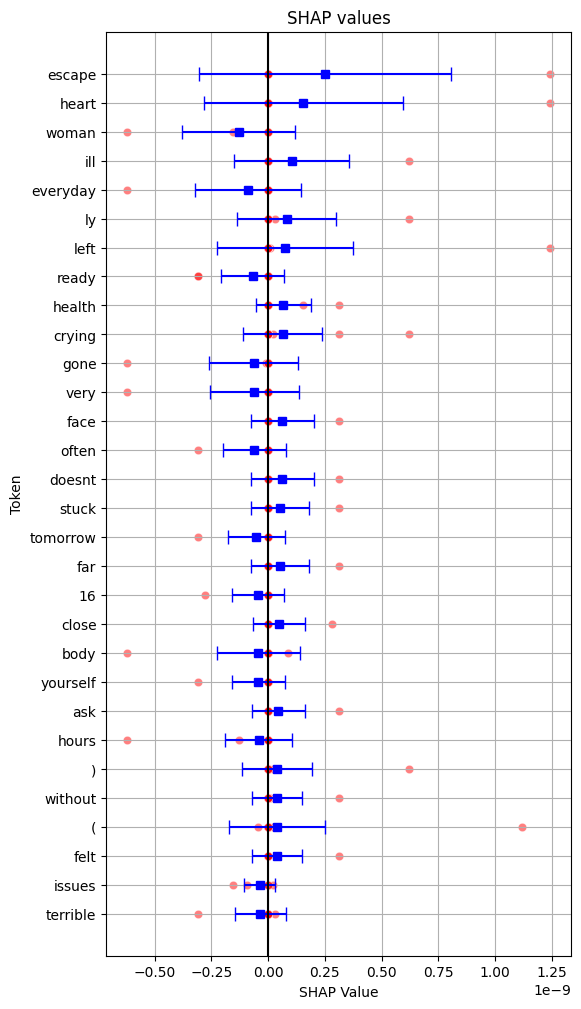

Class=ideation


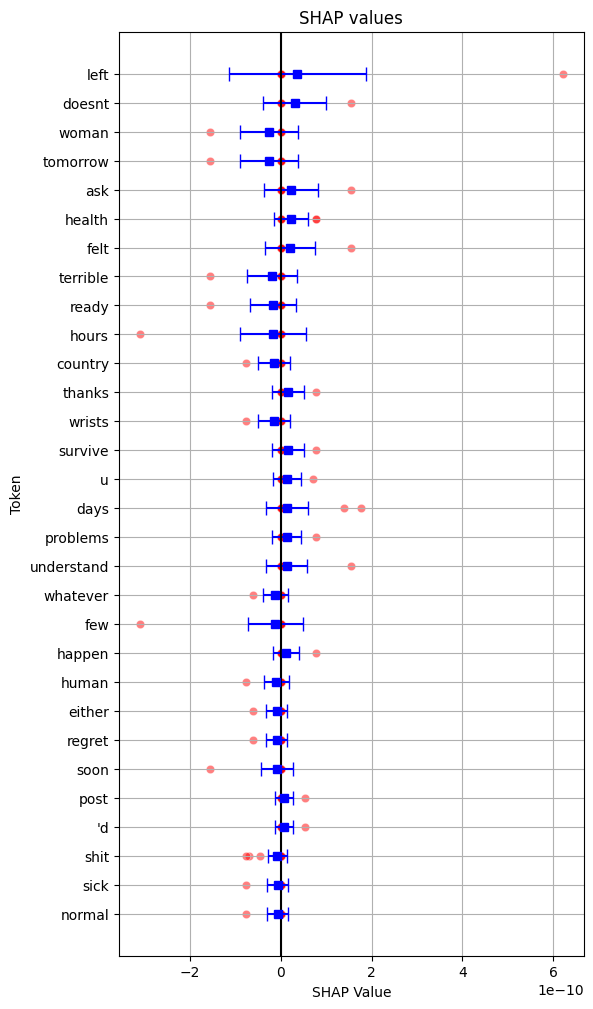

After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
After cleanup:
Allocated: 615.64 MiB
Cached: 690.00 MiB
Start Reasoning
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:29<00:14,  7.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:09,  9.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:55<00:00, 11.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.79s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.54s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:42<00:10, 10.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:56<00:00, 11.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:09, 13.95s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.56s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:30<00:16,  8.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:49<00:12, 12.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:03<00:00, 13.12s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:16, 15.27s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:43<00:00,  7.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [00:57, 11.42s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:32<00:13,  6.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:09,  9.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:59<00:00, 10.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:12, 14.44s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.45s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 10.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.56s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1283.98 MiB
Cached: 1454.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:27<00:13,  6.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:40<00:09,  9.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:53<00:00, 10.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:08, 13.64s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1383.48 MiB
Cached: 1674.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:28<00:14,  7.28s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:41<00:09,  9.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:54<00:00, 11.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:07, 13.58s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1478.98 MiB
Cached: 1670.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:31<00:18,  9.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:45<00:11, 11.08s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.89s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:14, 14.89s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe
Converting 1/5 to Dataframe
Converting 2/5 to Dataframe
Converting 3/5 to Dataframe
Converting 4/5 to Dataframe
Done!!
After cleanup:
Allocated: 1186.48 MiB
Cached: 1292.00 MiB
Shape of final_layer_vectors_test: torch.Size([5, 3072])
After cleanup:
Allocated: 1776.48 MiB
Cached: 2052.00 MiB


  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  20%|████████████▌                                                  | 1/5 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  60%|█████████████████████████████████                      | 3/5 [00:38<00:13,  6.79s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer:  80%|████████████████████████████████████████████           | 4/5 [00:52<00:09,  9.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 100%|███████████████████████████████████████████████████████| 5/5 [01:05<00:00, 10.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]


PartitionExplainer explainer: 6it [01:18, 15.77s/it]                                                                    


Converting shap values to Dataframe. It takes a few minutes
Converting 0/5 to Dataframe


KeyboardInterrupt: 

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

set_random_seed(42)

# Code Execution Date
save_date = 'final_last'

date_complex = f'{save_date}_complex'
date_simple = f'{save_date}_simple'

num_labels = 4

dir_complex = f"results/{save_date}/{date_complex}"
dir_simple = f"results/{save_date}/{date_simple}"

set_random_seed(42)

df_test = pd.read_excel('test set/test set.xlsx') # setting your test data
df_test_complex = preprosessing_text(df_test, url_pattern)
df_test_simple = simple_fix_text(df_test, url_pattern)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Completion of data preparation')

cv_list1 = [2, 5]
cv_list2 = [4]

# Complex (HO Version)
for cv in cv_list1:

    shap_kind = 'HO_Version_complex'

    model_dir_cv = f'models/model_mental_LongFormer_Smoothing_FocalLoss_ClassBalancedLoss_20240816_cv_{cv}_complex'
    date_cv = f'{save_date}_{cv}_complex'
    dir_cv = f"results/{save_date}/{date_cv}"
    
    ## -- Prediction -- ## 
    model = (AutoModelForSequenceClassification
          .from_pretrained(model_dir_cv, num_labels=num_labels)
          .to(device))
    tokenizer = AutoTokenizer.from_pretrained(model_dir_cv)
    model.eval()

    dir_cv = f"results/{save_date}/{date_cv}"

    make_vector_data(model, tokenizer, df_test_complex, device, dir_cv, date_cv, 'test', shap_kind)

    ################################################################################################
    del model, tokenizer
    cleanup_gpu_memory()
    ################################################################################################

# Simple (HO Version)
for cv in cv_list1:

    shap_kind = 'HO_Version_simple'

    model_dir_cv = f'models/model_mental_LongFormer_Smoothing_FocalLoss_ClassBalancedLoss_20240816_cv_{cv}_simple'
    date_cv = f'{save_date}_{cv}_simple'
    dir_cv = f"results/{save_date}/{date_cv}"
    
    ## -- Prediction -- ## 
    model = (AutoModelForSequenceClassification
          .from_pretrained(model_dir_cv, num_labels=num_labels)
          .to(device))
    tokenizer = AutoTokenizer.from_pretrained(model_dir_cv)
    model.eval()

    dir_cv = f"results/{save_date}/{date_cv}"

    make_vector_data(model, tokenizer, df_test_simple, device, dir_cv, date_cv, 'test', shap_kind)

    ################################################################################################
    del model, tokenizer
    cleanup_gpu_memory()
    ################################################################################################

# simple (SK Version)
for cv in cv_list2:

    shap_kind = 'SK_Version_simple'

    model_dir_cv = f'models/model_mental_LongFormer_Smoothing_FocalLoss_ClassBalancedLoss_20240829_cv_{cv}_simple'
    date_cv = f'{save_date}_{cv}_simple'
    dir_cv = f"results/{save_date}/{date_cv}"
    
    ## -- Prediction -- ## 
    model = (AutoModelForSequenceClassification
          .from_pretrained(model_dir_cv, num_labels=num_labels)
          .to(device))
    tokenizer = AutoTokenizer.from_pretrained(model_dir_cv)
    model.eval()

    dir_cv = f"results/{save_date}/{date_cv}"

    make_vector_data(model, tokenizer, df_test_simple, device, dir_cv, date_cv, 'test', shap_kind)

    ################################################################################################
    del model, tokenizer
    cleanup_gpu_memory()
    ################################################################################################

In [5]:
# Complex
for cv in cv_list1:
    
    sub_dir = f'submits/{save_date}'
    
    print(sub_dir)
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)
        
    date_cv = f'{save_date}_{cv}_complex'
    dir_cv = f"results/{save_date}/{date_cv}"
    
    ## -- Summarize -- ##
    df_sub1 = pd.read_csv(f'{dir_cv}/submission_mental_LongFormer_test_{date_cv}.csv')
    
    df_sub1 = df_sub1[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
    df_sub1.reset_index(drop=False, inplace=True)
    df_sub1.rename(columns={'index': 'index'}, inplace=True)
    df_sub1['probability_distribution'] = df_sub1[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
    df_sub1 = df_sub1[['index', 'suicide risk', 'probability_distribution']]
    
    re_conversion_dict = {
        0: 'indicator',
        1: 'ideation',
        2: 'behavior',
        3: 'attempt'
    }
    
    df_sub1['suicide risk'] = df_sub1['suicide risk'].map(re_conversion_dict)
    print(df_sub1.shape)
    display(df_sub1)
    
    df_sub1.to_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_model_{date_cv}.xlsx', float_format='%.30f', index=False)

# Simple
for cv in cv_list2:
    
    sub_dir = f'submits/{save_date}'
    
    print(sub_dir)
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)
        
    date_cv = f'{save_date}_{cv}_simple'
    dir_cv = f"results/{save_date}/{date_cv}"
    
    ## -- Summarize -- ##
    df_sub1 = pd.read_csv(f'{dir_cv}/submission_mental_LongFormer_test_{date_cv}.csv')
    
    df_sub1 = df_sub1[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
    df_sub1.reset_index(drop=False, inplace=True)
    df_sub1.rename(columns={'index': 'index'}, inplace=True)
    df_sub1['probability_distribution'] = df_sub1[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
    df_sub1 = df_sub1[['index', 'suicide risk', 'probability_distribution']]
    
    re_conversion_dict = {
        0: 'indicator',
        1: 'ideation',
        2: 'behavior',
        3: 'attempt'
    }
    
    df_sub1['suicide risk'] = df_sub1['suicide risk'].map(re_conversion_dict)
    print(df_sub1.shape)
    display(df_sub1)
    
    df_sub1.to_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_model_{date_cv}.xlsx', float_format='%.30f', index=False)

submits/final_last
(100, 3)


,index,suicide risk,probability_distribution
0,0,ideation,"[0.1730337589979171, 0.6164404153823853, 0.209..."
1,1,ideation,"[0.1876318156719207, 0.6146919131278991, 0.196..."
2,2,ideation,"[0.1846355199813842, 0.6127477288246154, 0.201..."
3,3,ideation,"[0.1894944012165069, 0.6161690354347229, 0.193..."
4,4,ideation,"[0.1657270044088363, 0.6192266941070556, 0.213..."
...,...,...,...
95,95,attempt,"[0.0006133707356639, 0.0021754873450845, 0.286..."
96,96,attempt,"[0.0012224109377712, 0.009684357792139, 0.3403..."
97,97,ideation,"[0.1780754476785659, 0.6122450232505798, 0.208..."
98,98,ideation,"[0.1735556721687316, 0.615477442741394, 0.2098..."


submits/final_last
(100, 3)


,index,suicide risk,probability_distribution
0,0,ideation,"[0.2040806710720062, 0.6148438453674316, 0.180..."
1,1,ideation,"[0.1982743144035339, 0.615110158920288, 0.1859..."
2,2,ideation,"[0.1971290856599807, 0.6104899048805236, 0.191..."
3,3,ideation,"[0.1976338177919387, 0.6151173114776611, 0.186..."
4,4,ideation,"[0.1990752220153808, 0.6161399483680725, 0.183..."
...,...,...,...
95,95,attempt,"[0.0011995650129392, 0.0022215819917619, 0.322..."
96,96,attempt,"[0.0011973974760621, 0.0021844974253326, 0.319..."
97,97,attempt,"[0.0007541856030002, 0.0019475509179756, 0.321..."
98,98,behavior,"[0.0286749880760908, 0.041804764419794, 0.6732..."


submits/final_last
(100, 3)


,index,suicide risk,probability_distribution
0,0,behavior,"[0.0071810432709753, 0.2792704999446868, 0.604..."
1,1,ideation,"[0.1616800278425216, 0.6126428246498107, 0.223..."
2,2,ideation,"[0.4373796582221984, 0.5093804001808167, 0.052..."
3,3,ideation,"[0.1647285968065261, 0.6090310811996459, 0.224..."
4,4,ideation,"[0.11923748254776, 0.6196898221969604, 0.25548..."
...,...,...,...
95,95,attempt,"[0.0020816051401197, 0.0080479402095079, 0.304..."
96,96,attempt,"[0.0080708870664238, 0.0065542925149202, 0.283..."
97,97,ideation,"[0.1839174330234527, 0.6049141287803649, 0.209..."
98,98,attempt,"[0.0029184978920966, 0.0058877458795905, 0.279..."


# TabPFN

In [6]:
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
from sklearn.model_selection import train_test_split, StratifiedKFold

set_random_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

use_col_train = ['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3', 'post_risk']
use_col_test = ['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def prediction_TabPFN_simple(use_col_train, use_col_test, date, sub_dir, n):

    df_train_vector_simple = pd.read_csv(f'data/20240817_2_simple/submission_mental_LongFormer_train_20240817_2_simple.csv', index_col=0)
    df_test_vector_simple = pd.read_csv(f'results/{save_date}/{save_date}_{n}_simple/submission_mental_LongFormer_test_{save_date}_{n}_simple.csv', index_col=0)

    ## -- Summarize -- ##
    df_train_vector = df_train_vector_simple[use_col_train].reset_index(drop=True)
    df_test_vector = df_test_vector_simple[use_col_test].reset_index(drop=True)

    data_set = df_train_vector.drop('post_risk', axis=1).reset_index(drop=True)
    target_set = df_train_vector['post_risk'].reset_index(drop=True)

    cvs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    bst_scr = 0

    cv_results = []

    for fold, (train_index, test_index) in enumerate(skf.split(data_set, target_set)):

        cvs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        bst_scr = 0
        
        print(f'Fold {fold + 1}')
        
        X_train, X_valid = data_set.iloc[train_index], data_set.iloc[test_index]
        y_train, y_valid = target_set.iloc[train_index], target_set.iloc[test_index]
        
        for cv in cvs:
            TabPFN_classifier = TabPFNClassifier(device = device, N_ensemble_configurations=cv)
            TabPFN_classifier.fit(X_train, y_train)
            y_pred = TabPFN_classifier.predict(X_valid)
            F1 = f1_score(y_valid, y_pred, average='weighted')

            if bst_scr < F1:
                use_cv = cv
                bst_scr = F1

        print('Best N_ensemble_configurations:', use_cv)
        print('Best F1:', bst_scr)
        
        # Creating Submission Files
        X_train = df_train_vector.drop('post_risk', axis=1)
        y_train = df_train_vector['post_risk']
        X_test = df_test_vector
        
        TabPFN_classifier = TabPFNClassifier(device = device, N_ensemble_configurations=use_cv)
        TabPFN_classifier.fit(X_train, y_train)
        
        y_pred_proba = TabPFN_classifier.predict_proba(X_test)
        y_pred = TabPFN_classifier.predict(X_test)
        
        df_sub = pd.DataFrame(y_pred_proba, columns=[f'Pred_class_{i}' for i in range(y_pred_proba.shape[1])])
        cv_results.append(df_sub)

    # Combine the results of each CV
    all_cv_results = pd.concat(cv_results, axis=0)
    
    # Calculate the average of the results
    average_result = all_cv_results.groupby(all_cv_results.index).mean()

    conditions = [
        (average_result['Pred_class_0'] > average_result[['Pred_class_1', 'Pred_class_2', 'Pred_class_3']].max(axis=1)),
        (average_result['Pred_class_1'] > average_result[['Pred_class_0', 'Pred_class_2', 'Pred_class_3']].max(axis=1)),
        (average_result['Pred_class_2'] > average_result[['Pred_class_0', 'Pred_class_1', 'Pred_class_3']].max(axis=1)),
        (average_result['Pred_class_3'] > average_result[['Pred_class_0', 'Pred_class_1', 'Pred_class_2']].max(axis=1))
    ]
    choices = ['indicator', 'ideation', 'behavior', 'attempt']
    
    average_result['suicide risk'] = np.select(conditions, choices, default='unknown')
    
    average_result = average_result[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
    average_result.reset_index(drop=False, inplace=True)
    average_result.rename(columns={'index': 'index'}, inplace=True)
    average_result['probability_distribution'] = average_result[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
    average_result = average_result[['index', 'suicide risk', 'probability_distribution']]
        
    print(average_result.shape)
    display(average_result)
    
    average_result.to_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_TabPFN_{date}.xlsx', float_format='%.30f', index=False)

date = f'{save_date}_2_simple'
prediction_TabPFN_simple(use_col_train, use_col_test, date, sub_dir, 2)

Fold 1


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/model_builder.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state, optimizer_state, config_

Best N_ensemble_configurations: 6
Best F1: 0.9032678491957531
Fold 2


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

Best N_ensemble_configurations: 1
Best F1: 0.9108436435359514
Fold 3


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

Best N_ensemble_configurations: 1
Best F1: 0.9080839548924655
Fold 4


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

Best N_ensemble_configurations: 5
Best F1: 0.9228830067539746
Fold 5


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

Best N_ensemble_configurations: 1
Best F1: 0.9520859937861826
(100, 3)


/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=fp16_inference):
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/m-suzuki-5y3/myenv/lib/python3.10/site-packages/tabpfn/scripts/transformer_prediction_interface.py:530: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

,index,suicide risk,probability_distribution
0,0,behavior,"[0.0016282133292406797, 0.010079917497932911, ..."
1,1,ideation,"[0.003026545513421297, 0.9952012896537781, 0.0..."
2,2,ideation,"[0.0215448085218668, 0.9748407602310181, 0.003..."
3,3,ideation,"[0.0026520281098783016, 0.9954853057861328, 0...."
4,4,behavior,"[0.001318176742643118, 0.008297508582472801, 0..."
...,...,...,...
95,95,attempt,"[0.007675287313759327, 0.00802171416580677, 0...."
96,96,attempt,"[0.005171393044292927, 0.006709394045174122, 0..."
97,97,attempt,"[0.0028030481189489365, 0.000320888968417421, ..."
98,98,ideation,"[0.0010234920773655176, 0.9965173006057739, 0...."


# Final result

In [7]:
import os
import ast
import numpy as np

df1 = pd.read_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_model_{save_date}_2_complex.xlsx') # 0.7326
df2 = pd.read_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_model_{save_date}_5_complex.xlsx') # 0.7349
df3 = pd.read_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_TabPFN_{save_date}_2_simple.xlsx') # 0.7359
df4 = pd.read_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_model_{save_date}_4_simple.xlsx') # 0.7326

df1.set_index('index', inplace=True)
df2.set_index('index', inplace=True)
df3.set_index('index', inplace=True)
df4.set_index('index', inplace=True)

df1['probability_distribution'] = df1['probability_distribution'].apply(ast.literal_eval)
df2['probability_distribution'] = df2['probability_distribution'].apply(ast.literal_eval)
df3['probability_distribution'] = df3['probability_distribution'].apply(ast.literal_eval)
df4['probability_distribution'] = df4['probability_distribution'].apply(ast.literal_eval)

df1[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] = pd.DataFrame(df1['probability_distribution'].tolist(), index=df1.index)
df2[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] = pd.DataFrame(df2['probability_distribution'].tolist(), index=df2.index)
df3[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] = pd.DataFrame(df3['probability_distribution'].tolist(), index=df3.index)
df4[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] = pd.DataFrame(df4['probability_distribution'].tolist(), index=df4.index)

In [8]:
df_avg = (df1[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] + df2[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
         + df3[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']] + df4[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]) / 4


# Store the name of the class with the highest predicted probability in the SUICIDE RISK column
conditions = [
    (df_avg['Pred_class_0'] > df_avg[['Pred_class_1', 'Pred_class_2', 'Pred_class_3']].max(axis=1)),
    (df_avg['Pred_class_1'] > df_avg[['Pred_class_0', 'Pred_class_2', 'Pred_class_3']].max(axis=1)),
    (df_avg['Pred_class_2'] > df_avg[['Pred_class_0', 'Pred_class_1', 'Pred_class_3']].max(axis=1)),
    (df_avg['Pred_class_3'] > df_avg[['Pred_class_0', 'Pred_class_1', 'Pred_class_2']].max(axis=1))
]
choices = ['indicator', 'ideation', 'behavior', 'attempt']

df_avg['suicide risk'] = np.select(conditions, choices, default='unknown')

df_avg = df_avg[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
df_avg.reset_index(drop=False, inplace=True)
df_avg.rename(columns={'index': 'index'}, inplace=True)
df_avg['probability_distribution'] = df_avg[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
df_avg = df_avg[['index', 'suicide risk', 'probability_distribution']]

df_avg.to_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_CV_simple_complex_final.xlsx', float_format='%.30f', index=False)
display(df_avg)

,index,suicide risk,probability_distribution
0,0,behavior,"[0.09648092166753482, 0.3801586695481092, 0.48..."
1,1,ideation,"[0.13765317585784936, 0.709411546587944, 0.152..."
2,2,ideation,"[0.21017226809635753, 0.6768646985292435, 0.11..."
3,3,ideation,"[0.1386272109812125, 0.7089506834745407, 0.151..."
4,4,ideation,"[0.12133947142865506, 0.46583849331364036, 0.4..."
...,...,...,...
95,95,attempt,"[0.0028924570506205314, 0.005116680928040268, ..."
96,96,attempt,"[0.0039155221311375065, 0.006283135444391481, ..."
97,97,attempt,"[0.09138752860599193, 0.30485689797933446, 0.1..."
98,98,ideation,"[0.05154316255357113, 0.41492181341163814, 0.2..."


# Reproducibility Confirmation

In [9]:
df_confirm = pd.read_excel('data/confirm_data/mukumuku_submission_mental_LongFormer_CV_simple_complex_top4.xlsx')

df_result = pd.read_excel(f'{sub_dir}/mukumuku_submission_mental_LongFormer_CV_simple_complex_final.xlsx')

different_rows = df_confirm[df_confirm['suicide risk'] != df_result['suicide risk']]

# Reproducibility Confirmation
if different_rows.empty:
    print("Success!!")
else:
    print(different_rows)

    index suicide risk                           probability_distribution
0       0    indicator  [0.7669128626585007, 0.2298883525654673, 0.002...
1       1      attempt  [0.0021777112124254697, 0.00244037326774556, 0...
2       2    indicator  [0.7736727148294449, 0.2237899340689182, 0.001...
3       3     behavior  [0.0015128645754884573, 0.15564860333688552, 0...
4       4    indicator  [0.7794577181339264, 0.21672414569184179, 0.00...
..    ...          ...                                                ...
92     92     ideation  [0.13550978017156007, 0.7073834091424942, 0.15...
93     93     behavior  [0.0012549895764095297, 0.15090174670331177, 0...
94     94     ideation  [0.26935282722115517, 0.5923729687929153, 0.13...
97     97     ideation  [0.24010218496550803, 0.659854382276535, 0.099...
99     99     ideation  [0.12671094331017227, 0.7103280425071716, 0.16...

[73 rows x 3 columns]
